## Homework 3: Imbalanced Datasets

### Instructions:
Please upload the *.ipynb* AND *.pdf* to Gradescope prior to the deadline (10/31). Submission on Courseworks/Canvas is **not** required, and won't be accepted.

Please name your soltution file in the following format - AML_HW3_Solutions_(YOUR_UNI)


### GIST:
The goal of this assignment is to build a model that can reliably predict the fraudulent transactions from a Credit Card fraud dataset. You will notice that, without much effort, you can build a model that gives you a very high ‘accuracy’ score. However, this metric is misleading since the model cannot correctly classify instances of the minority class (‘1’ in this case). This can be attributed to the  inherent imbalance present in the target column of the dataset.  

To solve this issue, you will need to employ certain ML techniques that are designed to counter class imbalance. Hence, the focus of this assignment will be towards addressing class imbalance and testing the model using different evaluation metrics other than just accuracy.

## Name:  Eesun Moon

## UNI: em3907

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import below any other packages you need for your solution
import matplotlib.pyplot as plt
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc

In [2]:
#libraries
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, roc_curve,classification_report,ConfusionMatrixDisplay
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **1. Examining Class Imbalance.**

a. Examine the class imbalance in the target column. What is its class distribution? Show this information visually using an appropriate scale. </br>
b. What is the degree of imbalance? (Mild/Moderate/Extreme)

In [4]:
# a-1
print("Number of Total data: {}".format(df.shape[0]))
print("Number of Positive Labels: {}".format(df[df['Class'] == 1].shape[0]))
print("Number of Negative Labels: {}".format(df[df['Class'] == 0].shape[0]))

Number of Total data: 284807
Number of Positive Labels: 492
Number of Negative Labels: 284315


In [5]:
print("Proportion between Positive Label(Class=1) and Negative Label(Class=0)")
print(df['Class'].value_counts(normalize=True))

print("\nThe number of Classes")
print(df['Class'].value_counts())

Proportion between Positive Label(Class=1) and Negative Label(Class=0)
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

The number of Classes
Class
0    284315
1       492
Name: count, dtype: int64


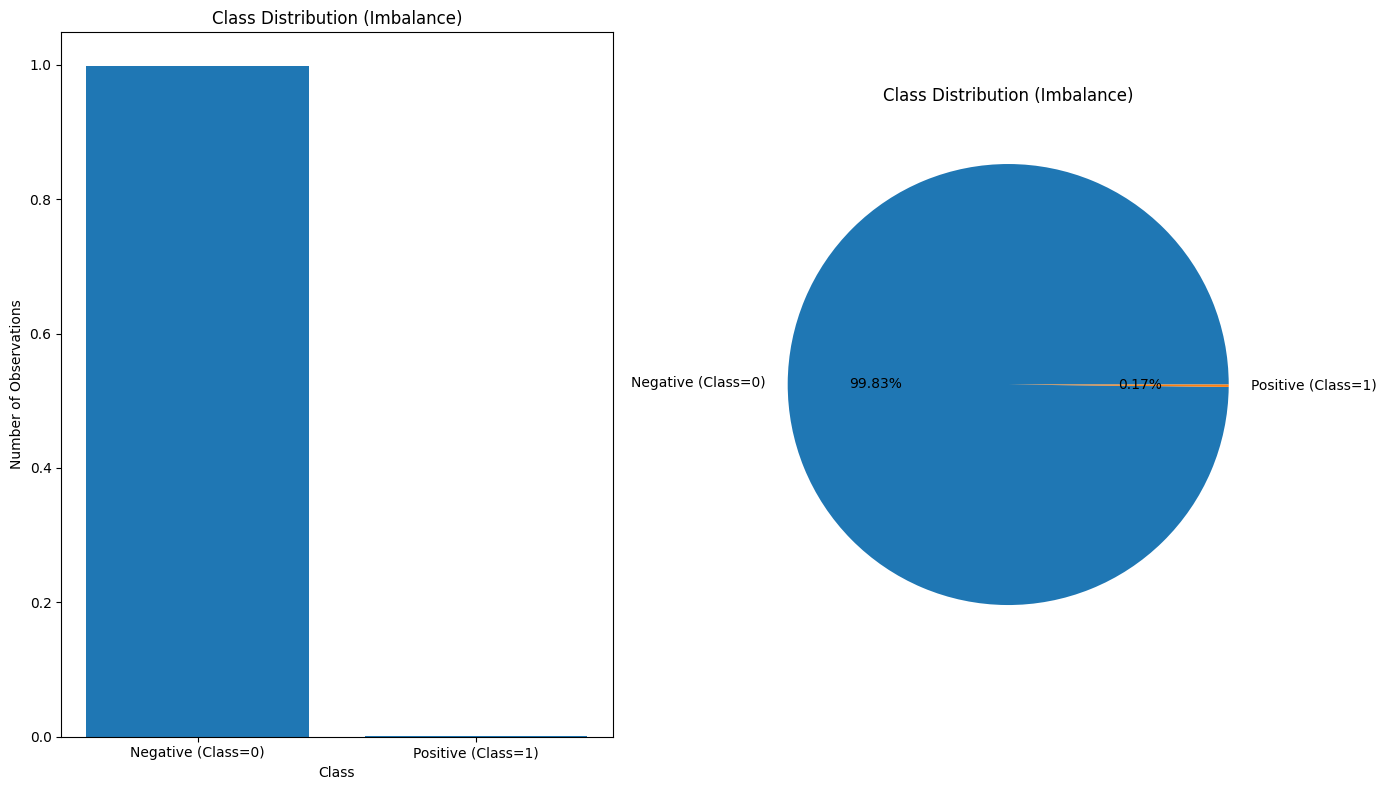

In [6]:
# a-2) visualization

class_counts = df['Class'].value_counts(normalize=True)
labels = ['Negative (Class=0)', 'Positive (Class=1)']

fig, ax = plt.subplots(1, 2, figsize=(14,8))

ax[0].bar(labels, class_counts)
ax[0].set_title("Class Distribution (Imbalance)")
ax[0].set_xlabel("Class")
ax[0].set_ylabel("Number of Observations")

ax[1].pie(class_counts, labels=labels,autopct="%1.2f%%")
ax[1].set_title("Class Distribution (Imbalance)")

plt.tight_layout()
plt.show()

Q-b: What is the degree of imbalance? (Mild/Moderate/Extreme)

This dataset is an **extreme imbalance**, with the positive class accounting for only about 0.17% of the data, while the negative class comprises approximately 99.83%. The positive class is, therefore, exceedingly rare in comparison to the negative class.

### **2. Pre-processing**

The raw data has a few issues. <br>
Since we are unsure what the time column actually means so drop the Time column.
The Amount column also has a wide range of values covered so we take the log of the Amount column to reduce its range. <br>

The below is already done for you.

In [7]:
# You don't want the 'Time' column. Pop it off
df.pop('Time')

# The 'Amount' column covers a huge range. Convert it to log-space.
eps = 0.001
df['Log Amount'] = np.log(df.pop('Amount') + eps)

a. Split the dataset into development and test sets. What splitting methodology did you choose, and why? </br>
b. Scale numerical columns. </br>
c. Print the shape of the development and test set.

In [8]:
# a) Split the dataset into development and test sets

X = df.drop('Class', axis=1)
y = df['Class']

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("X_dev shape:", X_dev.shape)
print("X_test shape:", X_test.shape)
print("y_dev shape:", y_dev.shape)
print("y_test shape:", y_test.shape)

X_dev shape: (227845, 29)
X_test shape: (56962, 29)
y_dev shape: (227845,)
y_test shape: (56962,)


I used the **stratified train-test-split** method to maintain consistent class proportions in both the development and test sets. Given the extreme class imbalance in our dataset, with the positive class representing 0.17% and the negative class 99.83%, a random split could lead to subsets with very few or even no positive instances, resulting in unreliable model evaluation. By applying the stratified method, we preserve the target class distribution across both sets, supporting a more reliable model evaluation.

In [9]:
# b) Scale numerical columns

scaler = StandardScaler()
X_dev = scaler.fit_transform(X_dev)
X_test = scaler.transform(X_test)

In [10]:
# c) Print shape of the development and test set

print("Shape of the development set:", X_dev.shape)
print("Shape of the test set:", X_test.shape)

Shape of the development set: (227845, 29)
Shape of the test set: (56962, 29)


### 3.1 Default Dataset
Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation </br>

In [11]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
scores = cross_validate(dt, X_dev, y_dev, cv=5,
                        scoring = ['roc_auc', 'average_precision'])

print("AUC score of baseline: {}".format(scores['test_roc_auc']))
print("Average precision of baseline: {}".format(scores['test_average_precision']))

print("\nMean AUC score of baseline: {}".format(scores['test_roc_auc'].mean()))
print("Mean Average precision of baseline: {}".format(scores['test_average_precision'].mean()))

AUC score of baseline: [0.88756328 0.88400873 0.81260522 0.77454358 0.82104149]
Average precision of baseline: [0.62653551 0.71014615 0.60399496 0.58692296 0.68112078]

Mean AUC score of baseline: 0.8359524571279693
Mean Average precision of baseline: 0.641744070059615


### 3.2 Balanced Weight

a. Here, we are going to use a 'balanced' decision tree clasifier on the same dataset. Use max_depth=10 and random_state=42, and then print the AUC and Average Precision values of 5 Fold Cross Validation.

In [12]:
dt_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight = 'balanced')
scores_balanced = cross_validate(dt_balanced, X_dev, y_dev, cv=5,
                                scoring = ['roc_auc', 'average_precision'])

print("AUC score of balanced decision tree: {}".format(scores_balanced['test_roc_auc']))
print("Average precision of balanced decision tree: {}".format(scores_balanced['test_average_precision']))

print("\nMean AUC score of balanced decision tree: {}".format(scores_balanced['test_roc_auc'].mean()))
print("Mean Average precision of balanced decision tree: {}".format(scores_balanced['test_average_precision'].mean()))

AUC score of balanced decision tree: [0.88026358 0.95432645 0.90415573 0.91647782 0.87235086]
Average precision of balanced decision tree: [0.51935587 0.573068   0.50745277 0.56269097 0.4556111 ]

Mean AUC score of balanced decision tree: 0.905514887383234
Mean Average precision of balanced decision tree: 0.5236357414975382


### 3.3 Random Oversampling

a. Perform random oversampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [13]:
# a) Random Oversampling

ros = RandomOverSampler(random_state=42)
X_dev_oversample, y_dev_oversample = ros.fit_resample(X_dev, y_dev)

print("Shape of the development set after oversampling: ", X_dev_oversample.shape)
print("\nProportion between Class=1 and Class=0 after RandomOversampling")
# print(y_dev_oversample.value_counts(normalize=True))
print(y_dev_oversample.value_counts())

Shape of the development set after oversampling:  (454902, 29)

Proportion between Class=1 and Class=0 after RandomOversampling
Class
0    227451
1    227451
Name: count, dtype: int64


After applying Random Oversampling, the class distribution is now balanced, with 227,451 instances for both class 0 and class 1. This means that both classes now represent exactly 50% of the dataset by increasing the instances of the minority class through oversampling, making the class distribution equal and addressing the initial imbalance issue.

In [14]:
# b)

scores_oversample = cross_validate(dt, X_dev_oversample, y_dev_oversample, cv=5,
                                    scoring = ['roc_auc', 'average_precision'])

print("AUC score for oversampling: {}".format(scores_oversample['test_roc_auc']))
print("Average precision for oversampling: {}".format(scores_oversample['test_average_precision']))

print("\nMean AUC score for oversampling: {}".format(scores_oversample['test_roc_auc'].mean()))
print("Mean Average precision for oversampling: {}".format(scores_oversample['test_average_precision'].mean()))

AUC score for oversampling: [0.99886808 0.99929956 0.99900977 0.99926441 0.99932258]
Average precision for oversampling: [0.99816396 0.99884446 0.99826911 0.9986672  0.99874564]

Mean AUC score for oversampling: 0.9991528810903473
Mean Average precision for oversampling: 0.9985380738652964


### 3.4 Random Undersampling

a. Perform random undersampling on the development dataset. (Please set random state to 42 while doing this).
Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [15]:
# a)

rus = RandomUnderSampler(random_state=42)
X_dev_undersample, y_dev_undersample = rus.fit_resample(X_dev, y_dev)

print("Shape of the development set after undersampling: ", X_dev_undersample.shape)
print("\nProportion between Class=1 and Class=0 after RandomUndersampling")
# print(y_dev_undersample.value_counts(normalize=True))
print(y_dev_undersample.value_counts())

Shape of the development set after undersampling:  (788, 29)

Proportion between Class=1 and Class=0 after RandomUndersampling
Class
0    394
1    394
Name: count, dtype: int64


After applying Random Undersampling, the class distribution is balanced, with 394 instances for both class 0 and class 1. This means that both classes represent 50% of the dataset by dropping the instances of the majority class through undersampling, making the class distribution equal and addressing the initial imbalance issue.

In [16]:
# b)

scores_undersample = cross_validate(dt, X_dev_undersample, y_dev_undersample, cv=5,
                                    scoring = ['roc_auc', 'average_precision'])

print("AUC score for undersampling: {}".format(scores_undersample['test_roc_auc']))
print("Average precision for undersampling: {}".format(scores_undersample['test_average_precision']))

print("\nMean AUC score for undersampling: {}".format(scores_undersample['test_roc_auc'].mean()))
print("Mean Average precision for undersampling: {}".format(scores_undersample['test_average_precision'].mean()))

AUC score for undersampling: [0.93662875 0.94936709 0.9097901  0.92583577 0.92989289]
Average precision for undersampling: [0.91336577 0.92661432 0.86678359 0.90629539 0.89830283]

Mean AUC score for undersampling: 0.9303029182535673
Mean Average precision for undersampling: 0.9022723811037444


### 3.5 SMOTE

a. Perform Synthetic Minority Oversampling Technique (SMOTE) on the development dataset. (Please set random state to 42 while doing this). Examine the target column again. What is its class distribution now? Print the shape of the development set. </br>

b. Repeat part 3.1 again. Use the Decision tree classifier (use max_depth=10 and random_state=42) model and print the AUC and Average Precision values of 5 Fold Cross Validation

In [17]:
# a)

smote = SMOTE(random_state=42)
X_dev_smote, y_dev_smote = smote.fit_resample(X_dev, y_dev)

print("Shape of the development set after SMOTE: ", X_dev_smote.shape)
print("\nProportion between Class=1 and Class=0 after SMOTE")
# print(y_dev_smote.value_counts(normalize=True))
print(y_dev_smote.value_counts())

Shape of the development set after SMOTE:  (454902, 29)

Proportion between Class=1 and Class=0 after SMOTE
Class
0    227451
1    227451
Name: count, dtype: int64


After applying SMOTE, the class distribution is balanced, with 227,451 instances each for class 0 and class 1. This adjustment means that both classes represent 50% of the dataset by generating synthetic interpolated samples for the minority class through SMOTE, making the class distribution equal and addressing the initial imbalance issue.

In [18]:
# b)

scores_smote = cross_validate(dt, X_dev_smote, y_dev_smote, cv=5,
                              scoring = ['roc_auc', 'average_precision'])

print("AUC score for SMOTE: {}".format(scores_smote['test_roc_auc']))
print("Average precision for SMOTE: {}".format(scores_smote['test_average_precision']))

print("\nMean AUC score for SMOTE: {}".format(scores_smote['test_roc_auc'].mean()))
print("Mean Average precision for SMOTE: {}".format(scores_smote['test_average_precision'].mean()))

AUC score for SMOTE: [0.99757923 0.99738426 0.99772842 0.9972463  0.99714931]
Average precision for SMOTE: [0.99667622 0.99645425 0.99685462 0.99619248 0.99611009]

Mean AUC score for SMOTE: 0.9974175030591891
Mean Average precision for SMOTE: 0.9964575330041552


### 3.6 Visual Comparison

Prepare a plot comparing the class distribtion of the target column for each of the imbalance techiques used above. Use the default class split as well.

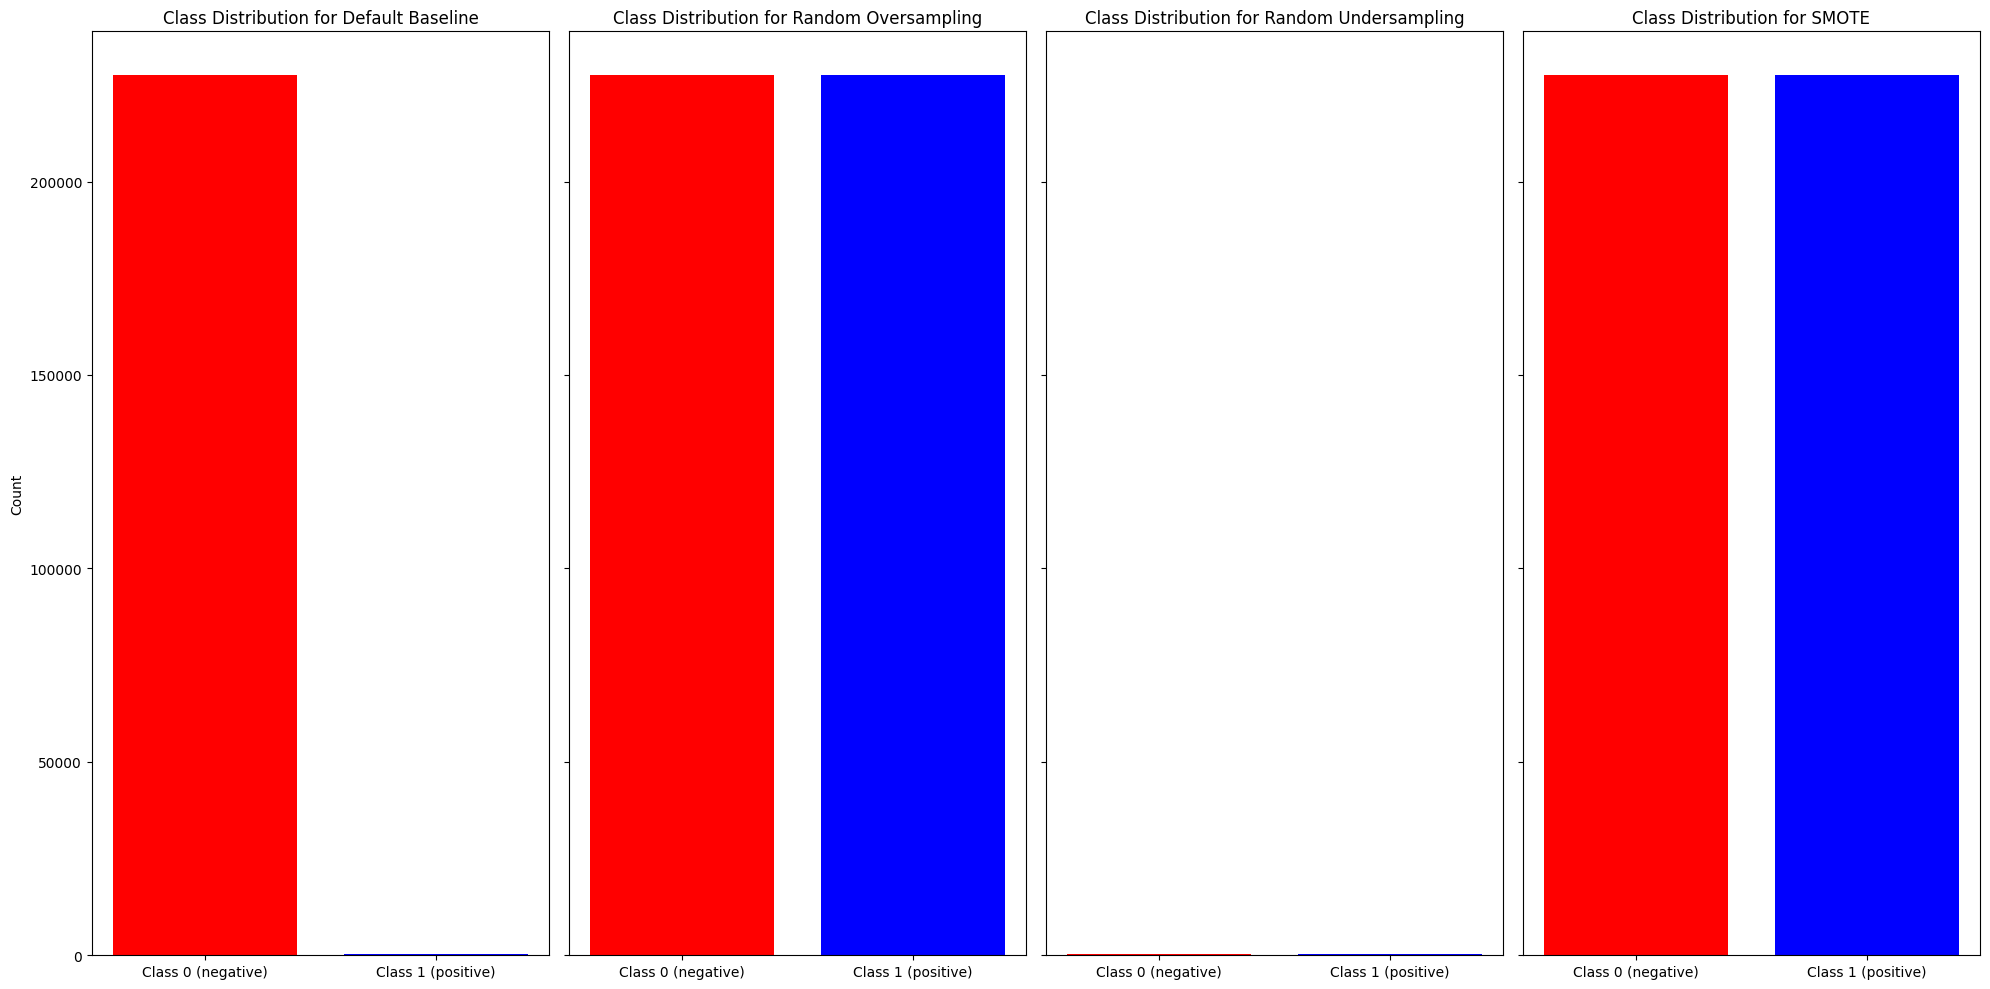

In [19]:
default_counts = y_dev.value_counts()
oversample_counts = y_dev_oversample.value_counts()
undersample_counts = y_dev_undersample.value_counts()
smote_counts = y_dev_smote.value_counts()

fig, ax = plt.subplots(1, 4, figsize=(20,10), sharey=True)

ax[0].bar(default_counts.index, default_counts.values, color=['red','blue'])
ax[0].set_title("Class Distribution for Default Baseline")
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
ax[0].set_ylabel('Count')

ax[1].bar(oversample_counts.index, oversample_counts.values, color=['red','blue'])
ax[1].set_title("Class Distribution for Random Oversampling")
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
# ax[1].set_ylabel('Count')

ax[2].bar(undersample_counts.index, undersample_counts.values, color=['red','blue'])
ax[2].set_title("Class Distribution for Random Undersampling")
ax[2].set_xticks([0,1])
ax[2].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
# ax[2].set_ylabel('Count')

ax[3].bar(smote_counts.index, smote_counts.values, color=['red','blue'])
ax[3].set_title("Class Distribution for SMOTE")
ax[3].set_xticks([0,1])
ax[3].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
# ax[3].set_ylabel('Count')

plt.tight_layout()
plt.show()

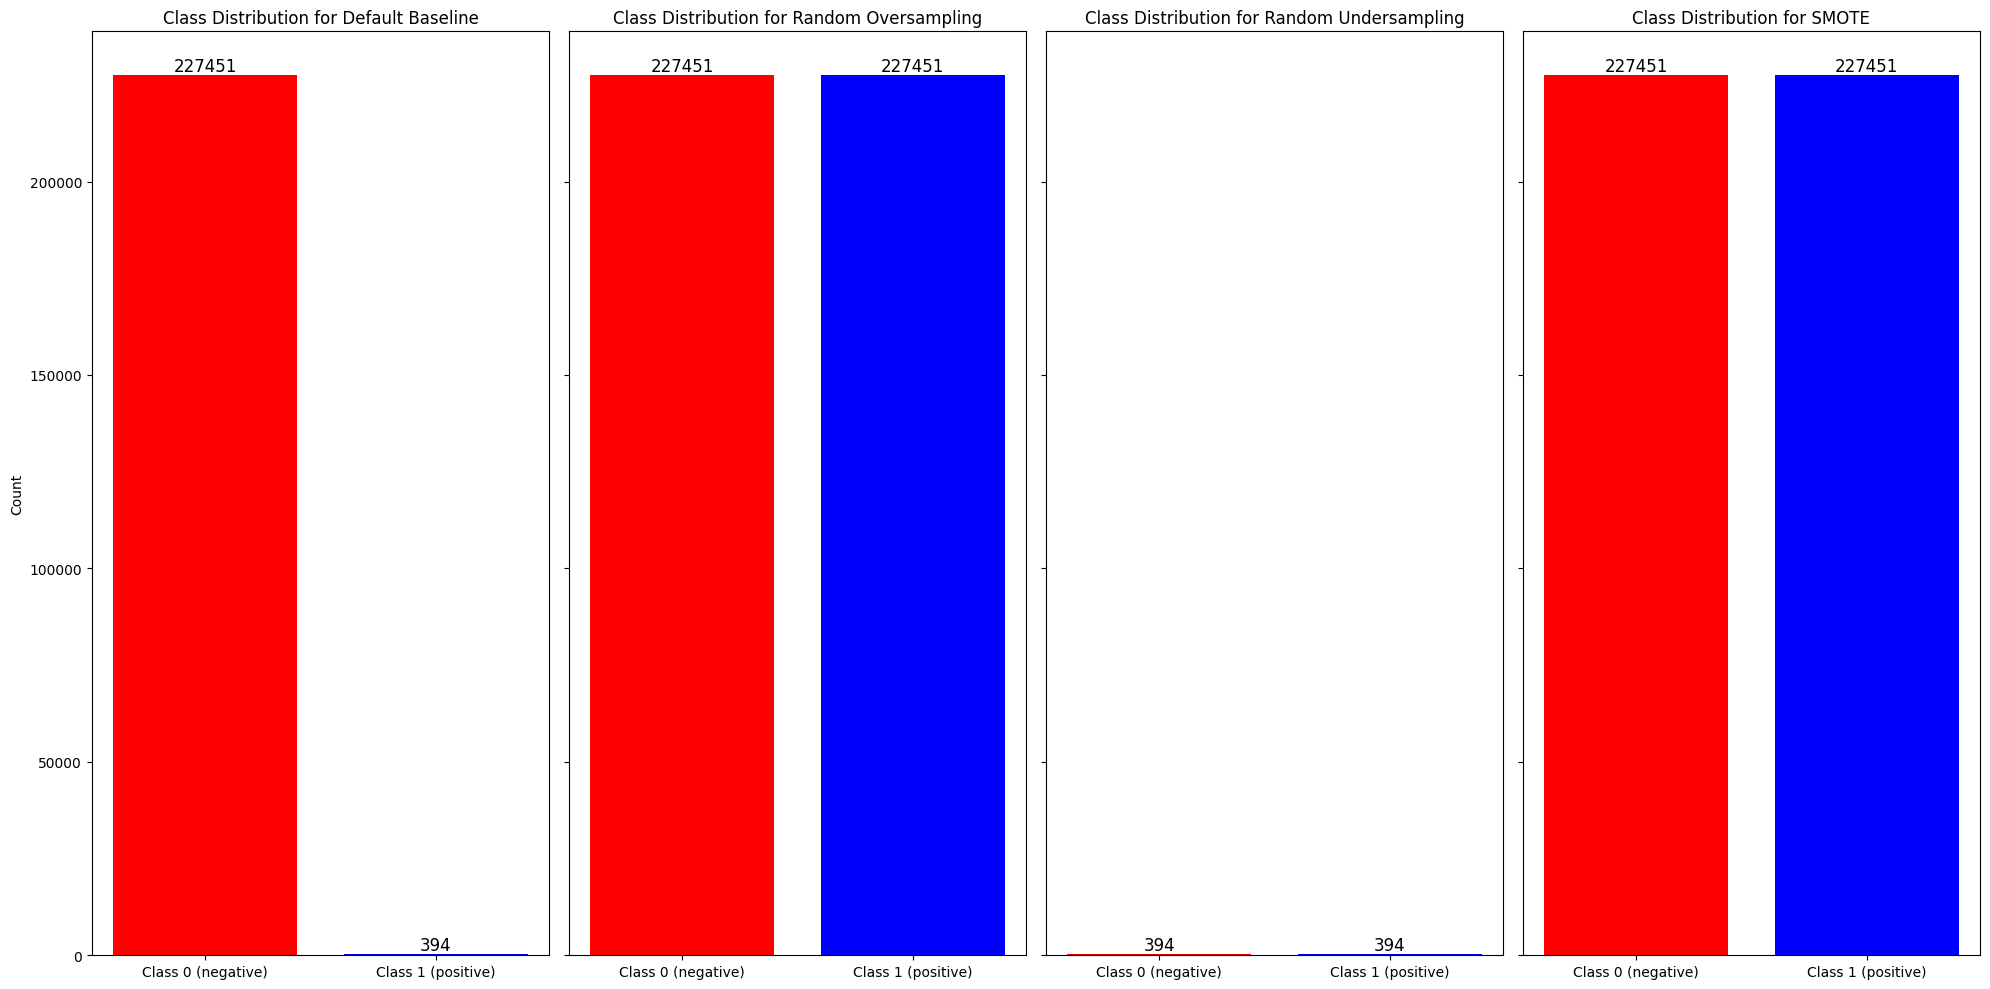

In [20]:
fig, ax = plt.subplots(1, 4, figsize=(20,10), sharey=True)

ax[0].bar(default_counts.index, default_counts.values, color=['red','blue'])
ax[0].set_title("Class Distribution for Default Baseline")
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
ax[0].set_ylabel('Count')
for i, v in enumerate(default_counts):
  ax[0].text(i, v+1000, str(v), ha='center', fontsize=12)

ax[1].bar(oversample_counts.index, oversample_counts.values, color=['red','blue'])
ax[1].set_title("Class Distribution for Random Oversampling")
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
# ax[1].set_ylabel('Count')
for i, v in enumerate(oversample_counts):
  ax[1].text(i, v+1000, str(v), ha='center', fontsize=12)

ax[2].bar(undersample_counts.index, undersample_counts.values, color=['red','blue'])
ax[2].set_title("Class Distribution for Random Undersampling")
ax[2].set_xticks([0,1])
ax[2].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
# ax[2].set_ylabel('Count')
for i, v in enumerate(undersample_counts):
  ax[2].text(i, v+1000, str(v), ha='center', fontsize=12)

ax[3].bar(smote_counts.index, smote_counts.values, color=['red','blue'])
ax[3].set_title("Class Distribution for SMOTE")
ax[3].set_xticks([0,1])
ax[3].set_xticklabels(['Class 0 (negative)', 'Class 1 (positive)'])
# ax[3].set_ylabel('Count')
for i, v in enumerate(smote_counts):
  ax[3].text(i, v+1000, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

### **4.1: Model Prediction & Evaluation - AUC Scores**
Make predictions on the test set using the five models that you built and report their AUC values<br>
(Five models include models from - Default Baseline, Random Undersampling, Random Oversampling, SMOTE & Balanced Weight). Did the models with high AUC scores on the development set exhibit similar performance on the test set? Explain.

In [21]:
# 1. Default Baseline
dt_baseline = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_baseline.fit(X_dev, y_dev)
y_pred_baseline = dt_baseline.predict_proba(X_test)[:, 1]
auc_baseline = roc_auc_score(y_test, y_pred_baseline)

# 2. Random Undersampling
dt_undersample = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_undersample.fit(X_dev_undersample, y_dev_undersample)
y_pred_undersample = dt_undersample.predict_proba(X_test)[:, 1]
auc_undersample = roc_auc_score(y_test, y_pred_undersample)

# 3. Random Oversampling
dt_oversample = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_oversample.fit(X_dev_oversample, y_dev_oversample)
y_pred_oversample = dt_oversample.predict_proba(X_test)[:, 1]
auc_oversample = roc_auc_score(y_test, y_pred_oversample)

# 4. SMOTE
dt_smote = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_smote.fit(X_dev_smote, y_dev_smote)
y_pred_smote = dt_smote.predict_proba(X_test)[:, 1]
auc_smote = roc_auc_score(y_test, y_pred_smote)

# 5. Balanced Weight with the original dataset
dt_balanced = DecisionTreeClassifier(max_depth=10, random_state=42, class_weight='balanced')
dt_balanced.fit(X_dev, y_dev)
y_pred_balanced = dt_balanced.predict_proba(X_test)[:, 1]
auc_balanced = roc_auc_score(y_test, y_pred_balanced)

In [22]:
print("AUC score on test set (Default Baseline Model):", auc_baseline)
print("AUC score on test set (Random Undersampling Model):", auc_undersample)
print("AUC score on test set (Random Oversampling Model):", auc_oversample)
print("AUC score on test set (SMOTE Model):", auc_smote)
print("AUC score on test set (Balanced Weight Model):", auc_balanced)
print()

results = {
    "Model": [
        "Default Baseline",
        "Random Undersampling",
        "Random Oversampling",
        "SMOTE",
        "Balanced Weight"
    ],
    "Development AUC Score": [
        scores['test_roc_auc'].mean(),
        scores_undersample['test_roc_auc'].mean(),
        scores_oversample['test_roc_auc'].mean(),
        scores_smote['test_roc_auc'].mean(),
        scores_balanced['test_roc_auc'].mean()
    ],
    "Test AUC Score": [
        auc_baseline,
        auc_undersample,
        auc_oversample,
        auc_smote,
        auc_balanced
    ]
}

roc_results = pd.DataFrame(results)
print(roc_results)

AUC score on test set (Default Baseline Model): 0.8196316775866227
AUC score on test set (Random Undersampling Model): 0.8959979162599198
AUC score on test set (Random Oversampling Model): 0.9016732009348478
AUC score on test set (SMOTE Model): 0.8752678248423735
AUC score on test set (Balanced Weight Model): 0.9017402244381152

                  Model  Development AUC Score  Test AUC Score
0      Default Baseline               0.835952        0.819632
1  Random Undersampling               0.930303        0.895998
2   Random Oversampling               0.999153        0.901673
3                 SMOTE               0.997418        0.875268
4       Balanced Weight               0.905515        0.901740


Q: Did the models with high AUC scores on the development set exhibit similar performance on the test set? Explain.

1. **Default Baseline Model**: The Development AUC Score is about 0.836, and the Test AUC Score is approximately 0.820. This model shows relatively consistent performance between the development and test sets, with only a minor decrease in AUC on the test set, indicating reasonable generalization.
2. **Random UnderSampling Model**: The Development AUC Score is around 0.930, while the Test AUC Score is about 0.896. This model experiences only a slight drop in AUC on the test set, indicating that random undersampling was effective in balancing the classes without causing significant overfitting.
3. **Random OverSampling Model**: The Development AUC Score is about 0.999, while the Test AUC Score is about 0.902. While this model achieved nearly perfect at AUC on the development set, there is a notable drop on the test set, suggesting that it may have overfitted to the development data due to oversampling.
4. **SMOTE Model**: The Development AUC Score is about 0.997, while the Test AUC Score is approximately 0.875. The SMOTE model also shows a significant drop in AUC on the test set, suggesting that SMOTE may have led to overfitting.
5. **Balanced Weight Model**: The Development AUC Score is about 0.906, and the Test AUC score is approximately 0.902. This model maintains consistent performance between the development and test sets, with almost no drop in AUC. This indicates that using balanced weights in the decision tree was an effective approach for handling class imbalance without leading to overfitting.

Overall, the models with the highest AUC scores on the development set, such as Random Oversampling and SMOTE, showed overfitting, as reflected in their lower test set performance compared to the development set. In contrast, the models that used random undersampling and balanced class weights showed more stable generalization from the development set to the test set, indicating that these approaches would be effective approaches for managing class imbalance in this dataset.

### **4.2: Model Prediction & Evaluation - Confusion Matrix**
a. Plot Confusion Matrices for all the five models on the test set. Comment on your results and share in detail. Consider precision, recall and f1 scores. <br>
b. For the dataset at hand, which evaluation metric matters most according to you? Would it make sense to prioritise either precision/recall over the other? Justify.

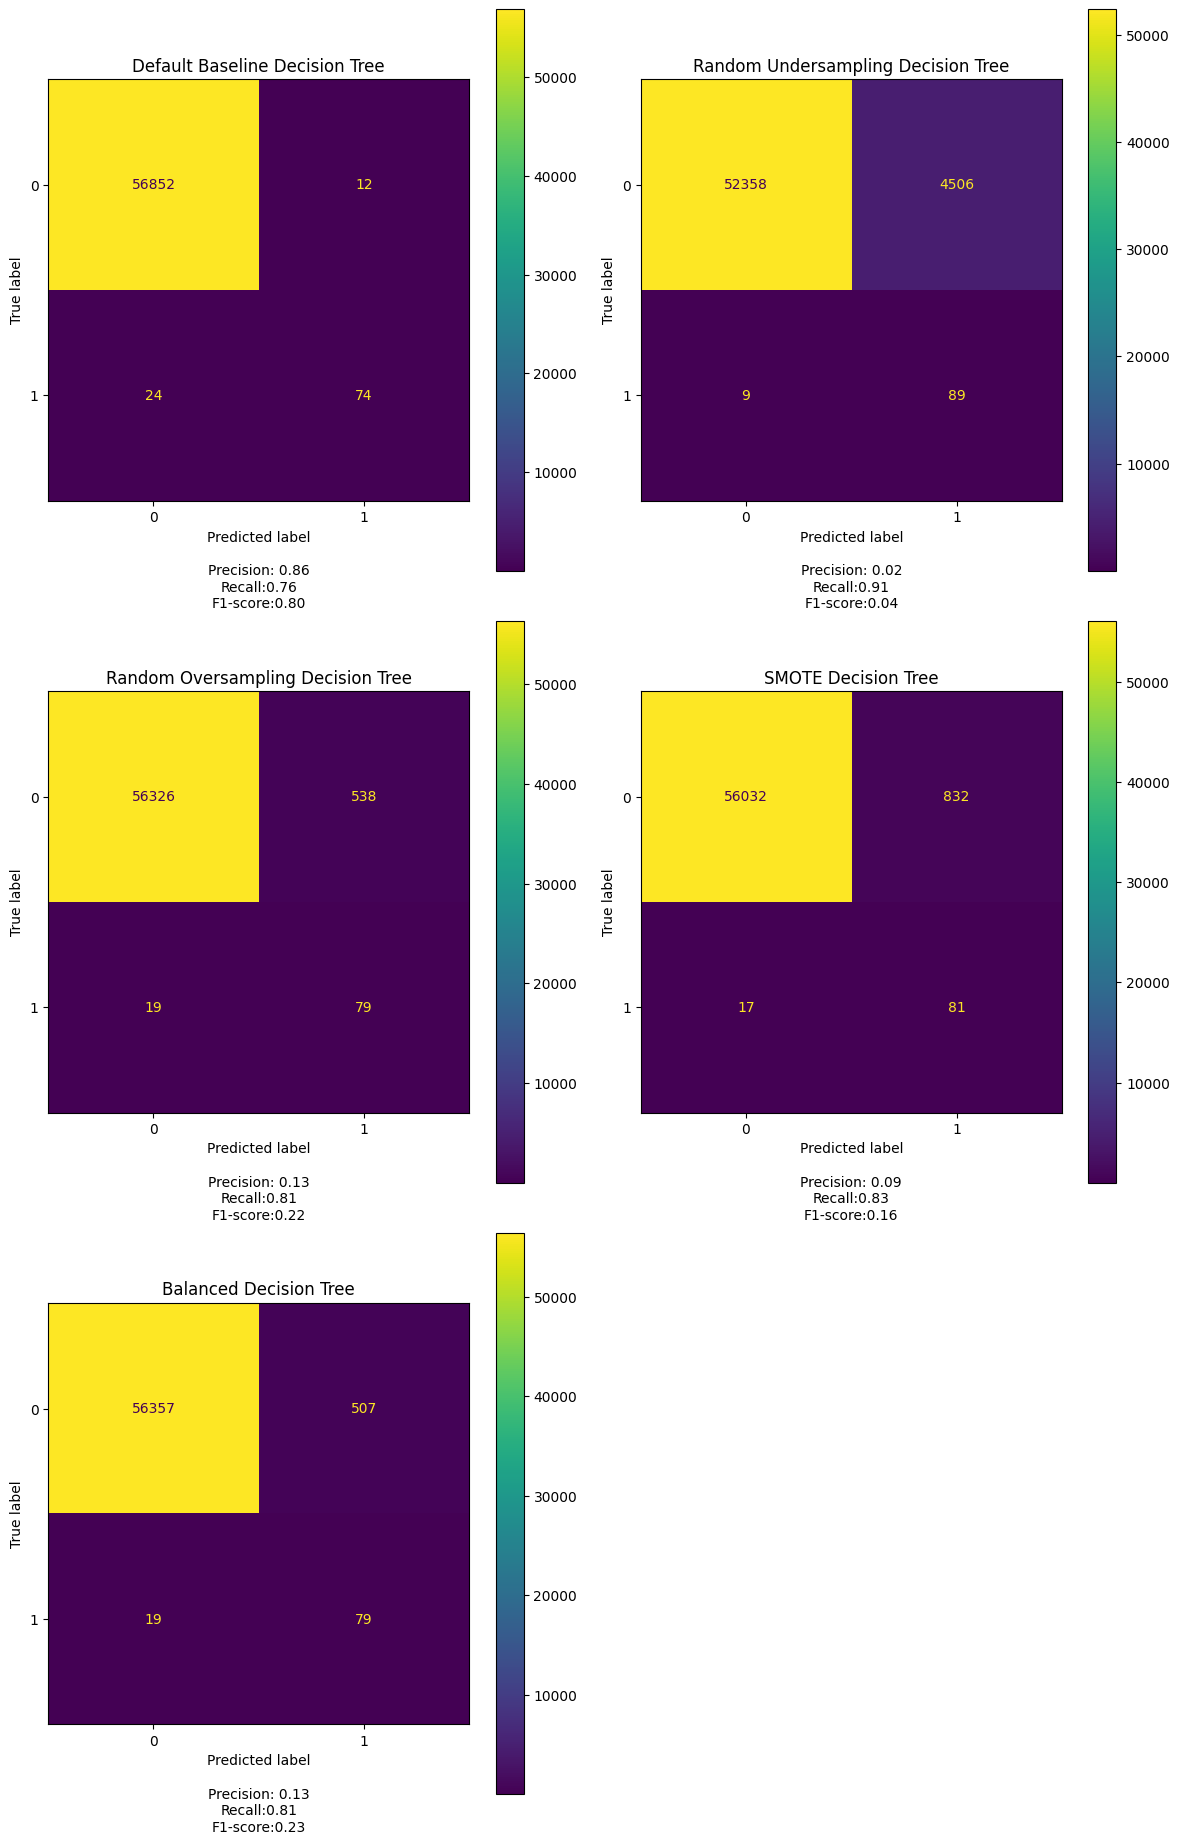

In [23]:
# a) visualize at once

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,20))
ax=ax.flatten()

models = [
    (dt_baseline, "Default Baseline Decision Tree"),
    (dt_undersample, "Random Undersampling Decision Tree"),
    (dt_oversample, "Random Oversampling Decision Tree"),
    (dt_smote, "SMOTE Decision Tree"),
    (dt_balanced, "Balanced Decision Tree")
]

for i, (model, title) in enumerate(models):
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax[i])
  ax[i].set_title(title)

  y_pred = model.predict(X_test)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  ax[i].text(0.5, -0.15, f"Precision: {precision:.2f}\nRecall:{recall:.2f}\nF1-score:{f1:.2f}",
             ha='center', va='top', transform=ax[i].transAxes)

fig.delaxes(ax[-1])

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

In the context of credit card fraud detection, recall means that the model's ability to capture most fraud cases (minimizing false negatives), while precision represents the proportion of predicted fraud cases that are actually fraud (minimizing false positives).
- false negatives: fraud cases as non-fraud
- false positives: non-fraud transactions are incorrectly flagged as fraud

1. **Default Baseline Decision Tree**: This model correctly identified 74 fraud cases and 56,852 legitimate transactions. However, it misclassified 24 fraud cases as legitimate (false negatives) and 12 legitimate transactions as fraud (false positives). Its precision is high at 0.86, indicating most transactions flagged as fraud are actually fraudulent. And, its recall is moderate at 0.76, showing that the model captures a large portion of fraud cases, even though it can misclassify some non-fraud cases. Its F1-score is high at 0.80, reflecting a good balance between precision and recall for the baseline model.

2. **Random UnderSampling Decision Tree**: This model correctly identified 89 fraud cases and 52,358 legitimate transactions but had 9 false negatives and 4,506 false positives. So, its precision is very low at 0.02, indicating that most non-fraud (legitimate) transactions are incorrectly classified as fraud. Its recall is very high at 0.91, indicating that the model can effectively capture most fraud cases. In terms of F1-score, it is extremely low at 0.04 due to the imbalance between precision and recalls, reflecting that this model would overlook precision to maximize recall and resulting in many false positives.

3. **Random OverSampling Decision Tree**: This model correctly predicted 79 fraud cases and 56,326 legitimate transactions, with 19 false negatives and 538 false positives. Its precision is relatively moderate at 0.13, showing an improvement over random undersampling but still resulting in some false positives. Its recall is good at 0.81, which means that the model can capture a lot of fraud cases. Even if the precision slightly increases compared to the Random Undersampling Decision Tree, there is still an imbalance between recall and precision,  resulting in a lower F1-score of 0.22. But its F1-score is improved compared to the undersampling model.

4. **SMOTE Decision Tree**: This model correctly identified 81 fraud cases and 56,032 legitimate transactions, with 17 false negatives and 832 false positives. Its precision is also low at 0.09, indicating that false positive are still relatively high. Its recall is high at 0.83, implying that the model can capture most fraud cases. Its F1-score is still low at 0.16 due to the imbalance between precision and recall.

5. **Balanced Weight Decision Tree**: This model correctly identified 79 fraud cases and 56,357 legitimate transactions, with 19 false negatives and 507 false positives. Its precision is relatively moderate at 0.13, showing improvement over the Random Undersampling and SMOTE models. Its recall is good at 0.81, capturing a lot of fraud cases. Its F1-score is relatively high at 0.23 among the Random Undersampling, Random Oversamplig, and SMOTE. Overall, this model achieved a balance between moderate precision and reduced false negatives, making it the most practical model for this task, where minimizing missed fraud cases is crucial.

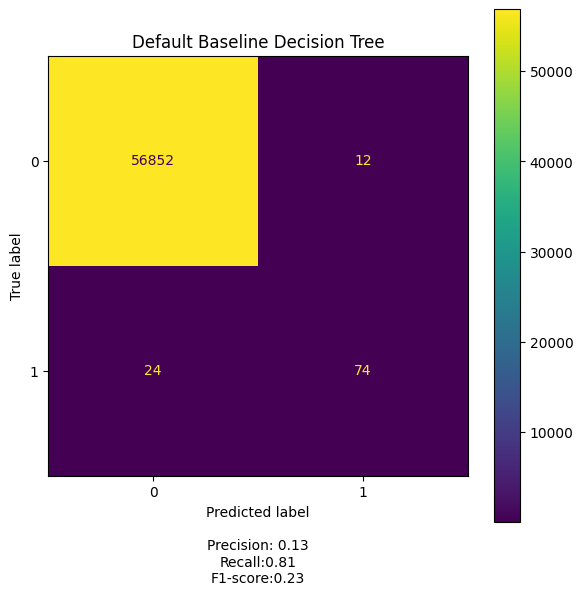


Classification Report
              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     56864
     Class 1       0.13      0.81      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [24]:
# a) individual plot - Baseline Default


models = [dt_baseline, "Default Baseline Decision Tree"]

fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(models[0], X_test, y_test, ax=ax)
ax.set_title(models[1])

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.text(0.5, -0.15, f"Precision: {precision:.2f}\nRecall:{recall:.2f}\nF1-score:{f1:.2f}",
        ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()
plt.show()

print("\nClassification Report")
target_names = ['Class 0','Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

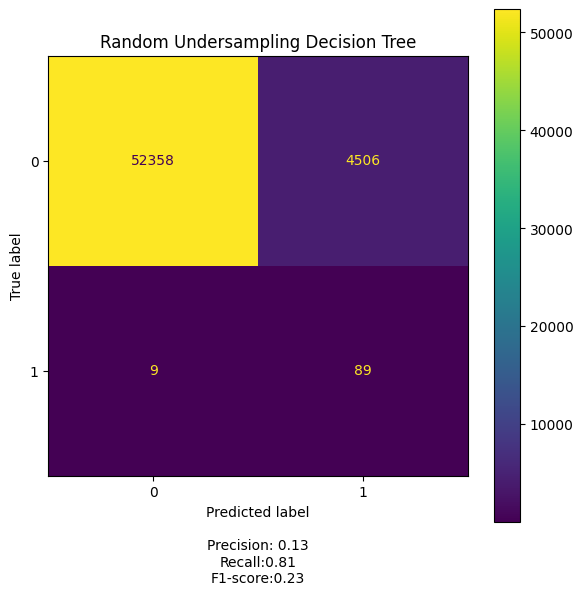


Classification Report
              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     56864
     Class 1       0.13      0.81      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [25]:
# a) individual plot - Random Undersampling

models = [dt_undersample, "Random Undersampling Decision Tree"]

fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(models[0], X_test, y_test, ax=ax)
ax.set_title(models[1])

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.text(0.5, -0.15, f"Precision: {precision:.2f}\nRecall:{recall:.2f}\nF1-score:{f1:.2f}",
        ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()
plt.show()

print("\nClassification Report")
target_names = ['Class 0','Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

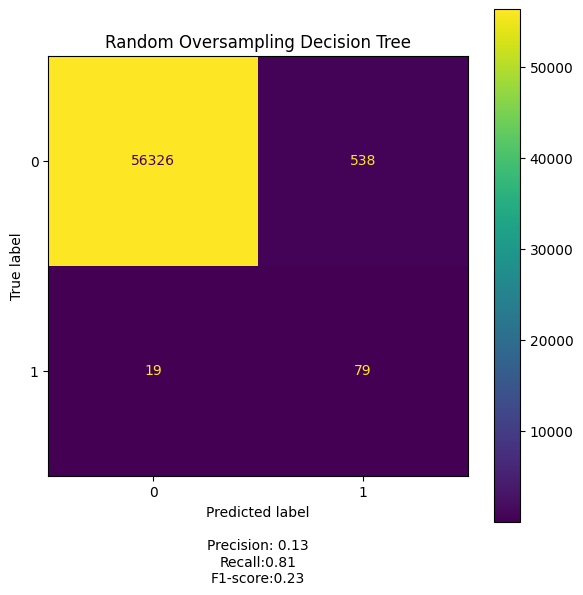


Classification Report
              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     56864
     Class 1       0.13      0.81      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [26]:
# a) individual plot - Random Oversampling

models = [dt_oversample, "Random Oversampling Decision Tree"]

fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(models[0], X_test, y_test, ax=ax)
ax.set_title(models[1])

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.text(0.5, -0.15, f"Precision: {precision:.2f}\nRecall:{recall:.2f}\nF1-score:{f1:.2f}",
        ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()
plt.show()

print("\nClassification Report")
target_names = ['Class 0','Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

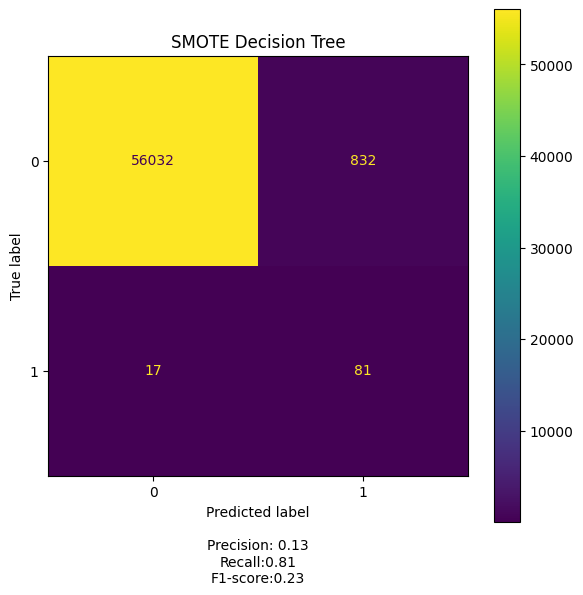


Classification Report
              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     56864
     Class 1       0.13      0.81      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [27]:
# a) individual plot - SMOTE

models = [dt_smote, "SMOTE Decision Tree"]

fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(models[0], X_test, y_test, ax=ax)
ax.set_title(models[1])

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.text(0.5, -0.15, f"Precision: {precision:.2f}\nRecall:{recall:.2f}\nF1-score:{f1:.2f}",
        ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()
plt.show()

print("\nClassification Report")
target_names = ['Class 0','Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

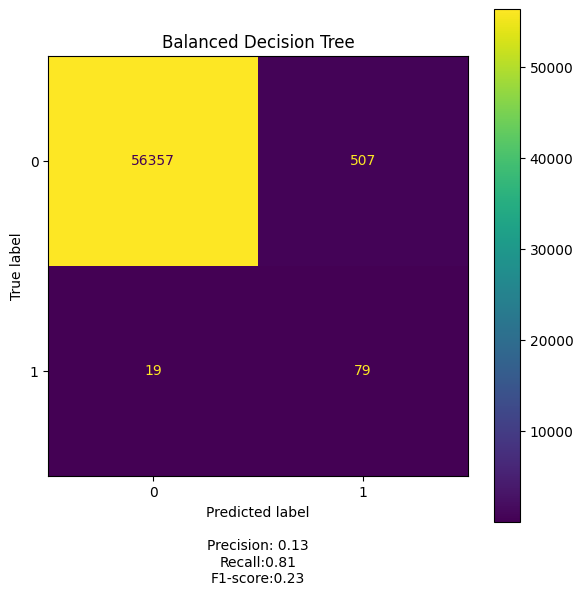


Classification Report
              precision    recall  f1-score   support

     Class 0       1.00      0.99      1.00     56864
     Class 1       0.13      0.81      0.23        98

    accuracy                           0.99     56962
   macro avg       0.57      0.90      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [28]:
# a) individual plot - Balanced Decision Tree

models = [dt_balanced, "Balanced Decision Tree"]

fig, ax = plt.subplots(figsize=(6,6))
ConfusionMatrixDisplay.from_estimator(models[0], X_test, y_test, ax=ax)
ax.set_title(models[1])

y_pred = model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

plt.text(0.5, -0.15, f"Precision: {precision:.2f}\nRecall:{recall:.2f}\nF1-score:{f1:.2f}",
        ha='center', va='top', transform=ax.transAxes)

plt.tight_layout()
plt.show()

print("\nClassification Report")
target_names = ['Class 0','Class 1']
print(classification_report(y_test, y_pred, target_names=target_names))

Q: For the dataset at hand, which evaluation metric matters most according to you? Would it make sense to prioritise either precision/recall over the other? Justify.

In the context of credit card fraud detection, prioritizing **recall** over precision is generally more appropriate to minimize missed fraud cases, thus reducing false negatives. A high recall ensures that the model successfully captures most of the actual fraud cases, while high precision focuses on reducing false alarms. However, in this case, the cost of missing actual fraud (false negative) is significantly higher than the inconvenience of a few false alarms (false positive). Furthermore, missing fraud cases can lead to serious consequences in the credit card industry, including security risks and financial losses. Therefore, prioritizing recall can help ensure that the majority of fraud cases are captured.

### **4.3: Model Prediction & Evaluation - ROC Curves**

Plot ROC for all the five models on the test set in a single plot. Recomment which technique is most appropriate and why.

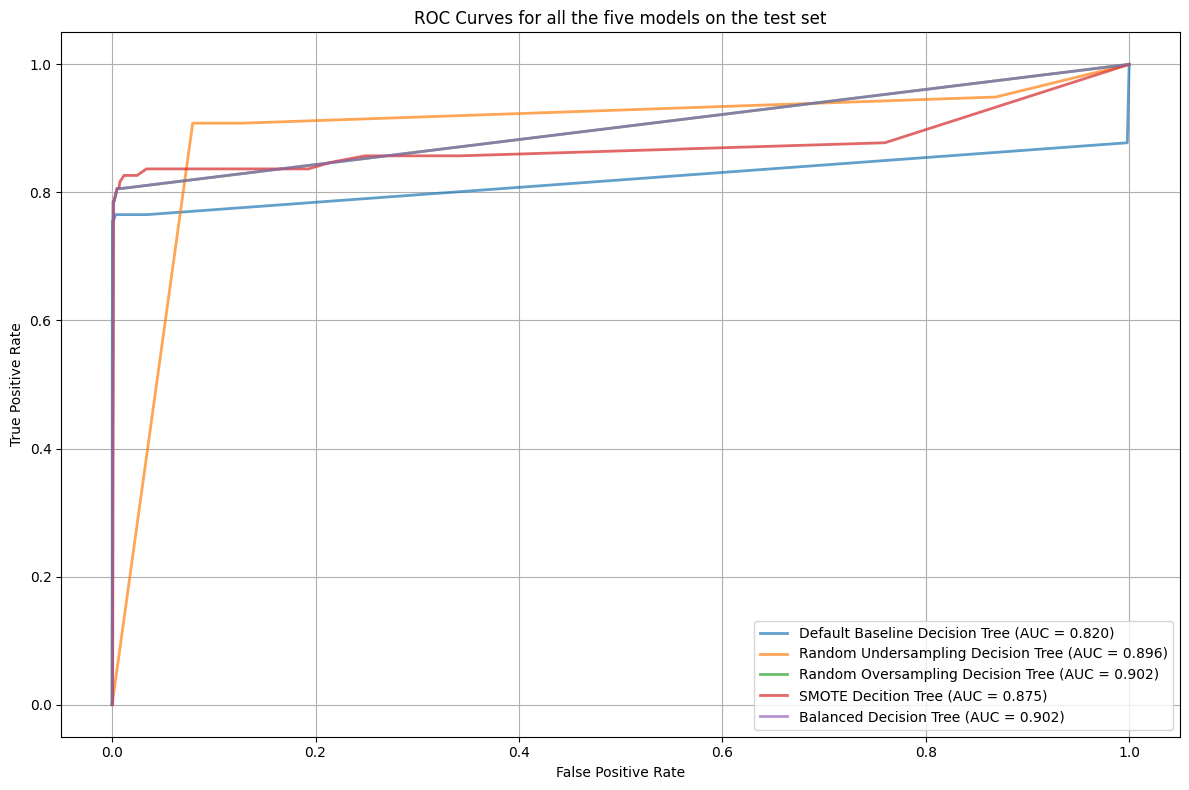

In [29]:
models = [
    (dt_baseline, "Default Baseline Decision Tree"),
    (dt_undersample, "Random Undersampling Decision Tree"),
    (dt_oversample, "Random Oversampling Decision Tree"),
    (dt_smote, "SMOTE Decition Tree"),
    (dt_balanced, "Balanced Decision Tree")
]

plt.figure(figsize=(12,8))
for model, title in models:
  y_pred_proba = model.predict_proba(X_test)[:,1]
  # print(title, y_pred_proba)

  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
  roc_auc = roc_auc_score(y_test, y_pred_proba)

  plt.plot(fpr, tpr, label=f"{title} (AUC = {roc_auc:.3f})", linewidth=2, alpha=0.7)


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for all the five models on the test set")
plt.legend(loc="lower right")
plt.tight_layout()
plt.grid(True)
plt.show()

Q: Recomment which technique is most appropriate and why.

Based on the ROC curves and AUC scores, I think that the **Random Oversampling Decision Tree** and **Balanced Decision Tree** are the most suitable models for this task.

In terms of ROC curves, proximity to the top-left corner of the ROC curve indicates best performance, as it reflects a high true positive rate (recall) and a low false positive rate. A higher AUC score shows the model's effectiveness in balancing the trade-off between detecting fraud causes (true positives) and minimizing false alarms across all thresholds.

In this plot, the Random Oversampling Decision Tree and Balanced Decision Tree might be overlapped. Both these models achieve the highest AUC of 0.902, with ROC curves that lie closer to the top-left corner, indicating the best overall performance in distinguishing fraud from non-fraud cases.

On the other hand, the Random Undersampling decision tree model has a slighly lower AUC of 0.896. Although its ROC curve is close to the top-left corner, its overall AUC score is slightly lower, suggesting it may not perform as consistently across all thresholds. For the SMOTE Decision Tree, its AUC is 0.875, and its ROC curve lies further from the top-left corner, indicating a lower true positive rate at the same false positive rate compared to the top-performing models. For the Default Baseline Decision Tree, this model has the lowest AUC at 0.820, as well as its ROC curve is the furthest from the top-left corner, indicating lower detection ability, making it the least suitable for this task. For these reasons, the Random Oversampling and Balanced Decision Tree models are the most effective choices for maximizing fraud detection while maintaining balanced performance across different thresholds.